In [9]:
import pandas as pd
df_att=pd.read_excel('./Jammer/Attacker.xlsx',sheet_name='1OBU')
df_jam=pd.read_excel('./Normal/Normal.xlsx',sheet_name='1OBU')

In [10]:
df_att.columns=df_att.iloc[0]
df_att.drop(index=df_att.index[0], axis=0, inplace=True)
df_att.drop(df_att.columns[0], axis=1, inplace=True)
df_att.drop(df_att.iloc[: , 11:15], axis=1, inplace=True)
df_att = df_att.head(30)

In [11]:
df_att.head()

,RSU Intended-Tx,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU PDSR (%),Car Received power (dBm),CAR Intended-Tx,Car-Btx-RSU,RSU P-Received,RSU-PDR (%)
1,10,10,100,1,10,55,-48.672344,10,10,1,10
2,10,10,100,0,0,50,-44.676311,10,10,1,10
3,10,8,80,1,12.5,46.25,-46.052743,10,10,0,0
4,10,10,100,0,0,50,-45.159092,10,10,1,10
5,10,10,100,1,10,55,-46.319235,10,10,1,10


In [12]:
df_jam.columns=df_jam.iloc[0]
df_jam.drop(index=df_jam.index[0], axis=0, inplace=True)
df_jam.drop(df_jam.columns[0], axis=1, inplace=True)
df_jam.drop(df_jam.iloc[: , 11:15], axis=1, inplace=True)
df_jam = df_jam.head(30)

In [13]:
df_jam.head()

,RSU Intended-Tx,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU-PDSR (%),CAR Intended-Tx,Car-Btx-RSU,Car-PSR (%),RSU P-Received,...,Car5 Rx,Car6 Rx,Car7 Rx,Car8 Rx,Car9 Rx,Car10 Rx,NaN,pkt number,pkt size,delay time
1,10,0,0,0,0,0,10,0,0,0,...,X,X,X,X,X,X,NaN,pkt no. 1 to pkt no. 10 lost. Accumlated packe...,NaN,NaN
2,10,10,100,10,100,100,10,9,90,9,...,X,X,X,X,X,X,NaN,no.11,"500 byte,",0.050894 sec
3,10,10,100,10,100,100,10,9,90,7,...,X,X,X,X,X,X,NaN,no.12,"500 byte,",0.051786 sec
4,10,10,100,10,100,100,10,10,100,10,...,X,X,X,X,X,X,NaN,no.13,"500 byte,",0.051825 sec
5,10,10,100,10,100,100,10,10,100,9,...,X,X,X,X,X,X,NaN,no.14,"500 byte,",0.050842 sec


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

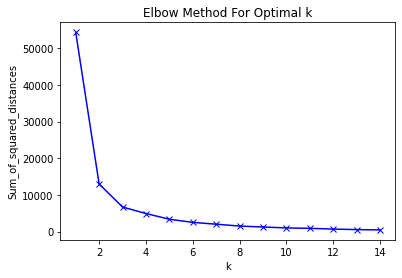

In [16]:
df_att1=df_att
cluster = []
K = range(1,15)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean = kmean.fit(df_att1)
    cluster.append(kmean.inertia_)
plt.plot(K, cluster, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/home/mivin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


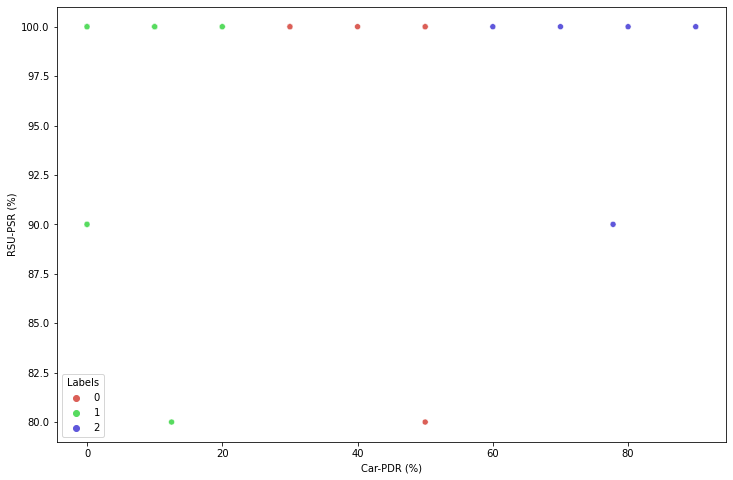

In [19]:
km = KMeans(n_clusters=3).fit(df_att1)

df_att1['Labels'] = km.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(df_att1['Car-PDR (%)'], df_att1['RSU-PSR (%)'], hue=df_att1['Labels'], palette=sns.color_palette('hls', 3))
plt.show()

In [20]:
df_jam2=df_jam
df_jam2.head()

,RSU Intended-Tx,RSU-BTx-Car,RSU-PSR (%),Car P-Received,Car-PDR (%),RSU-PDSR (%),CAR Intended-Tx,Car-Btx-RSU,Car-PSR (%),RSU P-Received,...,Car5 Rx,Car6 Rx,Car7 Rx,Car8 Rx,Car9 Rx,Car10 Rx,NaN,pkt number,pkt size,delay time
1,10,0,0,0,0,0,10,0,0,0,...,X,X,X,X,X,X,NaN,pkt no. 1 to pkt no. 10 lost. Accumlated packe...,NaN,NaN
2,10,10,100,10,100,100,10,9,90,9,...,X,X,X,X,X,X,NaN,no.11,"500 byte,",0.050894 sec
3,10,10,100,10,100,100,10,9,90,7,...,X,X,X,X,X,X,NaN,no.12,"500 byte,",0.051786 sec
4,10,10,100,10,100,100,10,10,100,10,...,X,X,X,X,X,X,NaN,no.13,"500 byte,",0.051825 sec
5,10,10,100,10,100,100,10,10,100,9,...,X,X,X,X,X,X,NaN,no.14,"500 byte,",0.050842 sec


In [22]:
cluster = []
K = range(1,15)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean = kmean.fit(df_jam2)
    cluster.append(kmean.inertia_)
plt.plot(K, cluster, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/home/mivin/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: could not convert string to float: 'X'

In [25]:
km = KMeans(n_clusters=2).fit(df_jam2)

df_jam2['Labels'] = km.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(df_jam2['Car-PDR (%)'], df_jam2['RSU-PSR (%)'], hue=df_jam2['Labels'], palette=sns.color_palette('hls', 2))
plt.show()

/home/mivin/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: could not convert string to float: 'X'

In [28]:
from sklearn.cluster import AgglomerativeClustering
hie_clus=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hie_clus.fit(df_att1)

AgglomerativeClustering(n_clusters=3)

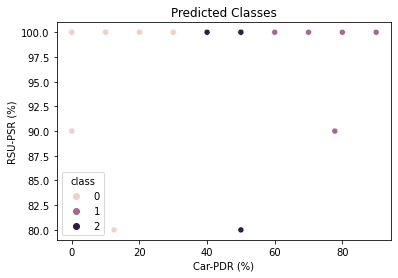

In [30]:
df_att1['class'] = hie_clus.labels_
plt.title('Predicted Classes')
sns.scatterplot(data=df_att1,x='Car-PDR (%)', y='RSU-PSR (%)', hue='class')
plt.show()

In [31]:
hie_clus=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
hie_clus.fit(df_jam2)

/home/mivin/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: could not convert string to float: 'X'

In [32]:
df_jam2['class'] = hie_clus.labels_

AttributeError: 'AgglomerativeClustering' object has no attribute 'labels_'

In [ ]:
plt.title('Predicted Classes')
sns.scatterplot(data=df_jam2,x='Car-PDR (%)', y='RSU-PSR (%)', hue='class')
plt.show()